In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif

plt.style.use('seaborn-colorblind')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
enem_train = pd.read_csv("train.csv")
enem_train.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
enem_test = pd.read_csv("test.csv")
enem_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

In [5]:
#Ok, nem tentar brincar com coluna que não está no treino
#E ja vou tirar os códigos das provas
enem_train = enem_train[['NU_INSCRICAO', 'NU_NOTA_MT','CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']]

## Conhecendo `NU_NOTA_MT`

In [6]:
enem_train.query('NU_NOTA_MT == 0').shape[1]

44

In [7]:
teste = enem_train.query('NU_NOTA_MT != 0')
teste['NU_NOTA_MT'].describe()

count    10123.000000
mean       482.974563
std         98.716334
min        320.500000
25%        409.000000
50%        461.200000
75%        537.700000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

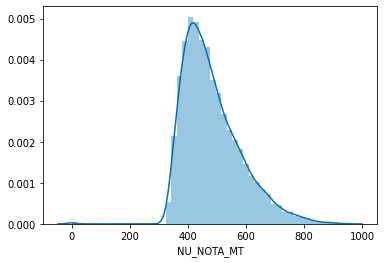

In [8]:
sns.distplot(enem_train['NU_NOTA_MT']);

In [9]:
print("Skewness: %f" % enem_train['NU_NOTA_MT'].skew())
print("Kurtosis: %f" % enem_train['NU_NOTA_MT'].kurt())

Skewness: 0.920690
Kurtosis: 1.422503


## Feature selection (Mario Filho)
[Tutorial Mario Filho](https://www.youtube.com/watch?v=Bcn5e7LYMhg)

minhas duas variáveis: enem_train e enem_test

In [10]:
# para essa selection tem que usar só as variáveis numéricas
# feature selection funciona para poucos dados(poucas linhas) e muitas colunas

df = enem_train.select_dtypes('number')
#LEMBRANDO Q NÃO E LEGAL FAZER CORRELAÇÃO ENTRE CATEGÓRICA E NUMÉRICA
df.fillna(-1, inplace=True)
print(df.columns.nunique())

33


In [11]:
df.head(2)

,NU_NOTA_MT,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,399.4,43,24,1,1,1,4,1,-1.0,0,...,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0
1,459.8,23,17,3,1,2,0,2,1.0,0,...,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0


In [12]:
X = df.drop('NU_NOTA_MT', axis=1)
y = df['NU_NOTA_MT']

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.5)
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((6865, 32), (6865, 32), (6865,), (6865,))

In [14]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

In [15]:
# tenho um dataset de regressão: prever uma variável contínua!!

#selectkbest usa f_regression para problemas de regressao ou outra função
#f regression pega a correlacao entre cada feature e o alvo, e, com isso, converter em um F-score e da um valor p
#se fosse classificacao é só usar o f_classif, (alvo eh variavel categorica)
k=5
selector = SelectKBest(score_func=f_regression, k=k)

#o fit calcula todas as correlacoes e armazena no objeto selector
#transform seleciona as k melhores colunas
X_train2 = selector.fit_transform(X_train, y_train)
X_val2 = selector.transform(X_train)

mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
mdl.fit(X_train2, y_train)

y_pred = mdl.predict(X_val2)

score = metrics.mean_absolute_error(y_val, y_pred)
print('k = {}, MAE = {}'.format(k,score))

k = 5, MAE = 239.77392294246175


In [16]:
k_vs_score = [] 
for k in range(2,33,1):
    selector = SelectKBest(score_func=f_regression, k=k)

    X_train2 = selector.fit_transform(X_train, y_train)
    X_val2 = selector.transform(X_train)

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)
    mdl.fit(X_train2, y_train)

    y_pred = mdl.predict(X_val2)

    score = metrics.mean_absolute_error(y_val, y_pred)
    
    k_vs_score.append(score) 

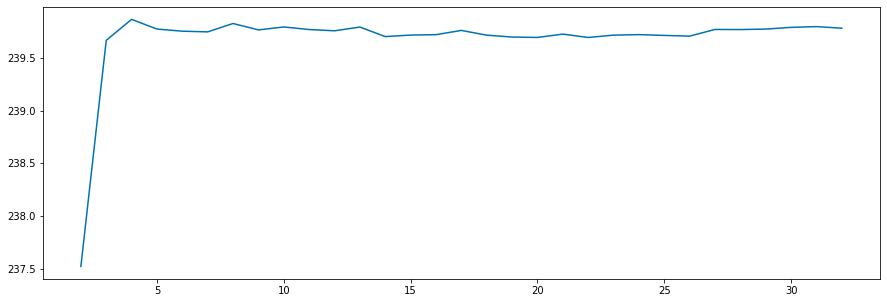

In [17]:
pd.Series(k_vs_score, index=range(2,33,1)).plot(figsize=(15,5))
#eixo x=qde de variáveis, eixo y =erro
#socorro que merda de gráfico! hahahaha

In [18]:
selector = SelectKBest(score_func = f_regression, k=5)
selector.fit(X_train,y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x7fcaf143e598>)

In [19]:
selector.get_support()
#true são as colunas selecionadas

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False, False, False, False, False])

In [20]:
X_val.iloc[:,selector.get_support()].head(2)

,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1
8277,1,415.4,382.2,460.7,120.0
5257,1,509.4,604.6,618.0,140.0


In [21]:
X_val.columns[selector.get_support()]

Index(['TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_COMP1'],
      dtype='object')

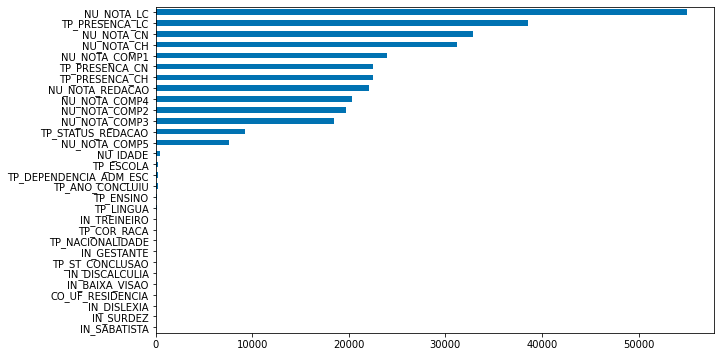

In [22]:
# selector.scores_= valores de F
pd.Series(selector.scores_, index=X_train.columns).dropna().sort_values(ascending=True).plot.barh(figsize=(10,6))
#QUANTO  MAIOR MELHOR, MAIOR CORRELACAO
#mas olha só, esse metodo não leva em consideração a correlação entre as variáveis preditoras (rendundancia!!!)

## Trabalhar com os floats
* NU_NOTA_COMP1
* NU_NOTA_COMP2
* NU_NOTA_COMP3
* NU_NOTA_COMP4
* NU_NOTA_COMP5
* NU_NOTA_REDACAO
* NU_NOTA_CN
* NU_NOTA_CH
* NU_NOTA_LC
* NU_NOTA_MT
* NU_IDADE

In [23]:
floats = enem_train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
                     'NU_NOTA_REDACAO','NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_IDADE']]

pd.DataFrame({'tipos':floats.dtypes, 
              'missing':floats.isna().sum()/floats.shape[0]*100})

,tipos,missing
NU_NOTA_COMP1,float64,26.198106
NU_NOTA_COMP2,float64,26.198106
NU_NOTA_COMP3,float64,26.198106
NU_NOTA_COMP4,float64,26.198106
NU_NOTA_COMP5,float64,26.198106
NU_NOTA_REDACAO,float64,26.198106
NU_NOTA_MT,float64,26.198106
NU_NOTA_CN,float64,24.683176
NU_NOTA_CH,float64,24.683176
NU_NOTA_LC,float64,26.198106


In [24]:
#para entender esses missing:
aux = enem_train[['TP_PRESENCA_CN','NU_NOTA_MT','NU_NOTA_CN']]
aux.query('TP_PRESENCA_CN == 0').head()

,TP_PRESENCA_CN,NU_NOTA_MT,NU_NOTA_CN
2,0,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN
9,0,NaN,NaN
13,0,NaN,NaN


In [25]:
#para entender esses missing:
aux = enem_train[['TP_PRESENCA_CH','TP_PRESENCA_LC','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']]
aux.query('TP_PRESENCA_CH == 0').head()

,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
2,0,0,NaN,NaN,NaN
3,0,0,NaN,NaN,NaN
4,0,0,NaN,NaN,NaN
9,0,0,NaN,NaN,NaN
13,0,0,NaN,NaN,NaN


In [26]:
enem_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
            'NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']].describe()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
count,10133.000000,10341.000000,10341.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,473.495155,529.661087,516.472841,529.048258,119.811704,111.915918,106.824238,113.123951,77.372446
std,99.826323,71.093674,73.726344,68.688190,154.294758,29.846017,33.737588,34.341349,33.480033,43.067140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,419.900000,480.400000,468.100000,440.000000,120.000000,100.000000,80.000000,100.000000,40.000000
50%,461.200000,459.800000,532.000000,520.900000,540.000000,120.000000,120.000000,120.000000,120.000000,80.000000
75%,537.600000,514.500000,581.200000,564.900000,600.000000,140.000000,120.000000,120.000000,120.000000,100.000000
max,952.000000,806.400000,807.000000,763.600000,1000.000000,200.000000,200.000000,200.000000,200.000000,200.000000


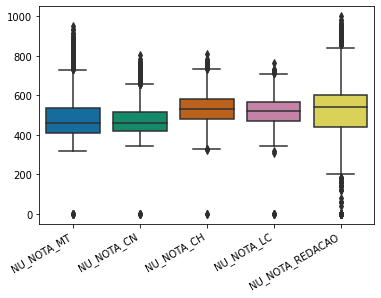

In [27]:
sns.boxplot(data=enem_train[['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO']])
plt.xticks(rotation=30, ha='right');

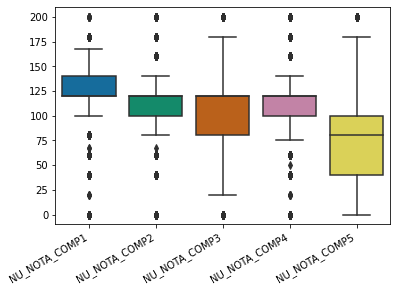

In [28]:
sns.boxplot(data=enem_train[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']])
plt.xticks(rotation=30, ha='right');

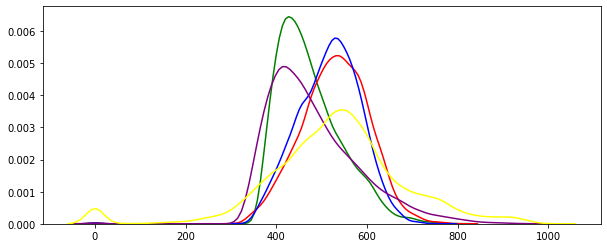

In [76]:
plt.figure(figsize=(10,4))
sns.distplot(enem_train['NU_NOTA_CN'], hist=False, color='green')
sns.distplot(enem_train['NU_NOTA_CH'], hist=False, color='red')
sns.distplot(enem_train['NU_NOTA_LC'], hist=False, color='blue')
sns.distplot(enem_train['NU_NOTA_MT'], hist=False, color='purple')
sns.distplot(enem_train['NU_NOTA_REDACAO'], hist=False, color='yellow')
plt.xlabel("")
plt.show()

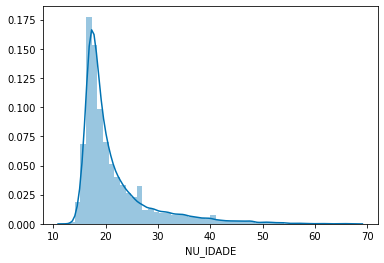

In [30]:
sns.distplot(enem_train['NU_IDADE'])

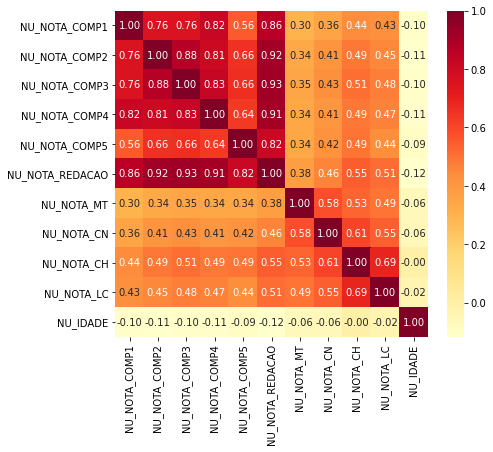

In [31]:
plt.figure(figsize=(7,6))
sns.heatmap(floats.corr(method='pearson'), cmap='YlOrRd', annot=True, fmt='.2f');

In [32]:
#correlação das features com 'NU_NOTA_MT'
correlacao=floats.corr()
print(correlacao['NU_NOTA_MT'])

NU_NOTA_COMP1      0.299402
NU_NOTA_COMP2      0.335638
NU_NOTA_COMP3      0.350307
NU_NOTA_COMP4      0.342282
NU_NOTA_COMP5      0.343337
NU_NOTA_REDACAO    0.379376
NU_NOTA_MT         1.000000
NU_NOTA_CN         0.584941
NU_NOTA_CH         0.529594
NU_NOTA_LC         0.494695
NU_IDADE          -0.061485
Name: NU_NOTA_MT, dtype: float64


In [33]:
enem_train_copy = enem_train.copy()

## Trabalhar com categóricas

In [34]:
enem_train.columns

Index(['NU_INSCRICAO', 'NU_NOTA_MT', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'],
      dtype='object')

In [35]:
categoricas_dig = enem_train[['NU_NOTA_MT','TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 
                              'Q027', 'Q047']]

In [36]:
categoricas_dig.isna().sum().sort_values(ascending=False).head(3)

Q027          7373
NU_NOTA_MT    3597
Q047             0
dtype: int64

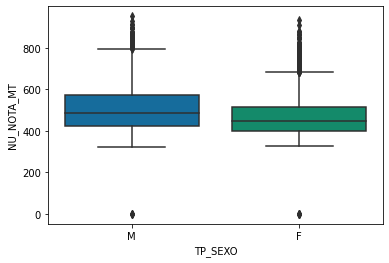

In [37]:
sns.boxplot(categoricas_dig.TP_SEXO, categoricas_dig.NU_NOTA_MT)

**OBS:** Todos os 'TP_SEXO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047' influenciam a nota de matemática pelos boxplot!!!

**OBS2**: Q027 muitos nulos

In [38]:
categoricas_num = enem_train[['NU_NOTA_MT', 'CO_UF_RESIDENCIA',
       'NU_IDADE', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO',
       'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO','TP_LINGUA', 'TP_STATUS_REDACAO']]

In [39]:
categoricas_num.TP_ANO_CONCLUIU.value_counts()

0     7206
1     1578
10    1167
2     1033
3      712
4      563
6      383
5      379
7      294
8      221
9      194
Name: TP_ANO_CONCLUIU, dtype: int64

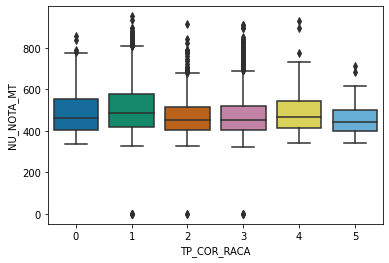

In [40]:
sns.boxplot(categoricas_num.TP_COR_RACA, categoricas_num.NU_NOTA_MT);

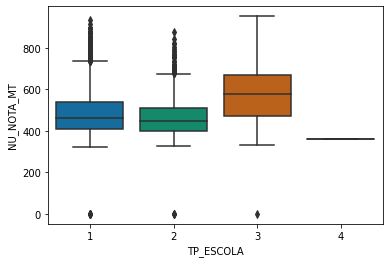

In [41]:
sns.boxplot(categoricas_num.TP_ESCOLA, categoricas_num.NU_NOTA_MT);

In [42]:
(categoricas_num.isna().sum()/categoricas_num.shape[0]*100).sort_values(ascending=False).head(6)

TP_DEPENDENCIA_ADM_ESC    68.812819
TP_ENSINO                 68.812819
TP_STATUS_REDACAO         26.198106
NU_NOTA_MT                26.198106
IN_SABATISTA               0.000000
CO_UF_RESIDENCIA           0.000000
dtype: float64

**OBS**: 'TP_NACIONALIDADE', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_STATUS_REDACAO' tem poucos valores contrastantes (5, 15...) não serve pra modelo.

**OBS2**: TP_ST_CONCLUSAO, TP_ANO_CONCLUIU, TP_ENSINO, IN_TREINEIRO aparentemente não influenciam na nota de matemática

**OBS3**: 'TP_ENSINO','TP_DEPENDENCIA_ADM_ESC' muitos NAN e não saberia lidar com eles

**Formando um dataframe**

In [43]:
df_train = enem_train[['NU_NOTA_MT', 'NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                       'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                       'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_COR_RACA,TP_ESCOLA,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,Q001,Q002,Q006,Q024,Q025,Q026,Q047
0,399.4,24,1,1,1,436.3,495.4,581.2,520.0,M,D,D,C,A,A,C,A
1,459.8,17,3,2,1,474.5,544.1,599.0,580.0,F,A,A,B,A,A,A,A
2,NaN,21,3,1,1,NaN,NaN,NaN,NaN,F,D,D,C,A,A,A,A
3,NaN,25,0,1,0,NaN,NaN,NaN,NaN,F,H,E,E,C,B,C,D
4,NaN,28,2,1,1,NaN,NaN,NaN,NaN,M,E,D,C,A,A,B,A


0	Não declarado
1	Branca
2	Preta
3	Parda
4	Amarela
5	Indígena 
6	Não dispõe da informação


1	Não Respondeu
2	Pública
3	Privada
4	Exterior


In [44]:
df_train['TP_SEXO'] = df_train['TP_SEXO'].map({'F':0, 'M':1}) 

df_train['TP_COR_RACA'] = df_train['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

df_train['TP_ESCOLA'] = df_train['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'}) 

In [45]:
df_train = pd.get_dummies(df_train)

In [46]:
(df_train.isna().sum()/df_train.shape[0]*100).sort_values(ascending=False).head(6)

NU_NOTA_MT         26.198106
NU_NOTA_LC         26.198106
NU_NOTA_REDACAO    26.198106
NU_NOTA_CN         24.683176
NU_NOTA_CH         24.683176
Q002_C              0.000000
dtype: float64

In [47]:
df_train.fillna(-1, inplace=True)

In [48]:
df_train.head()

,NU_NOTA_MT,NU_IDADE,TP_LINGUA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_SEXO,TP_COR_RACA_Branca,TP_COR_RACA_Outros,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,399.4,24,1,436.3,495.4,581.2,520.0,1,1,0,...,1,0,0,0,1,1,0,0,0,0
1,459.8,17,1,474.5,544.1,599.0,580.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
2,-1.0,21,1,-1.0,-1.0,-1.0,-1.0,0,0,1,...,1,0,1,0,0,1,0,0,0,0
3,-1.0,25,0,-1.0,-1.0,-1.0,-1.0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,-1.0,28,1,-1.0,-1.0,-1.0,-1.0,1,0,1,...,1,0,0,1,0,1,0,0,0,0


In [49]:
print('tenho',df_train.shape[1],'features')

tenho 60 features


In [50]:
y = df_train['NU_NOTA_MT']
X = df_train.drop('NU_NOTA_MT', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
X_test = enem_test[['NU_IDADE', 'TP_COR_RACA','TP_ESCOLA','TP_LINGUA',
                    'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                    'TP_SEXO','Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q047']]

X_test['TP_SEXO'] = X_test['TP_SEXO'].map({'F':0, 'M':1}) 

X_test['TP_COR_RACA'] = X_test['TP_COR_RACA'].map({0:'Outros', 6:'Outros', 1:'Branca', 2:'Outros', 
                                                       3:'Outros', 4:'Branca', 5:'Outros'})

X_test['TP_ESCOLA'] = X_test['TP_ESCOLA'].map({1:'Outras', 2:'Outras', 3:'Privada', 4:'Outras'})

X_test = pd.get_dummies(X_test)

X_test.fillna(-1, inplace=True)

## RANDOM FOREST

regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [53]:
random_forest = RandomForestRegressor(criterion='mse', max_depth=8, n_jobs=-1, random_state=0)
random_forest.fit(X_train, y_train)

y_pred_val = random_forest.predict(X_val)

mae_rf=metrics.mean_absolute_error(y_val, y_pred_val)
rmse_rf=np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))

print(mae_rf,rmse_rf)

41.808737870700845 62.05905467231355


In [54]:
y_pred = random_forest.predict(X_test)

In [55]:
answer = pd.DataFrame({'NU_INSCRICAO':enem_test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':enem_test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})
answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.631667
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,445.723752
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,586.279533
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,-1.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,555.669474


In [56]:
for index, row in answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        answer.loc[index,'NU_NOTA_MT'] = np.nan

answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.631667
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,445.723752
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,586.279533
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,555.669474


In [57]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.459213
std        99.001741
min        -1.000000
25%       436.671014
50%       458.459865
75%       500.137984
max       877.096569
Name: NU_NOTA_MT, dtype: float64

In [58]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)
answer.to_csv('answer.csv', index=False)

In [59]:
codenation_rf = 93.7467

## GRADIENT BOOSTING

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
gbr = GradientBoostingRegressor()

#treinando
gbr.fit(X_train,y_train)

#prevendo
y_pred_val = gbr.predict(X_val)

mae_gb = metrics.mean_absolute_error(y_val, y_pred_val)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_val, y_pred_val))

print(mae_gb,rmse_gb)

41.95243973232151 61.587718484269175


In [62]:
y_pred = random_forest.predict(X_test)

In [63]:
answer = pd.DataFrame({'NU_INSCRICAO':enem_test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':enem_test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})

for index, row in answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        answer.loc[index,'NU_NOTA_MT'] = np.nan

answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,423.631667
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,445.723752
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,586.279533
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,555.669474


In [64]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.459213
std        99.001741
min        -1.000000
25%       436.671014
50%       458.459865
75%       500.137984
max       877.096569
Name: NU_NOTA_MT, dtype: float64

In [65]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)
answer.to_csv('answer.csv', index=False)

In [66]:
codenation_gb = 93.7467

## XG-BOOST

In [67]:
from xgboost import XGBRegressor

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting rounds.
    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or a custom objective function to be 
        used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Default to auto.  If this parameter is set to default, XGBoost will 
        choose the most conservative option available.  It's recommended to study this option from parameters 
        document.
    n_jobs : int
        Number of parallel threads used to run xgboost.
    gamma : float
        Minimum loss reduction required to make a further partition on a leaf node of the tree.
    min_child_weight : int
        Minimum sum of instance weight(hessian) needed in a child.
    max_delta_step : int
        Maximum delta step we allow each tree's weight estimation to be.
    subsample : float
        Subsample ratio of the training instance.
    colsample_bytree : float
        Subsample ratio of columns when constructing each tree.
    colsample_bylevel : float
        Subsample ratio of columns for each level.
    colsample_bynode : float
        Subsample ratio of columns for each split.
    reg_alpha : float (xgb's alpha)
        L1 regularization term on weights
    reg_lambda : float (xgb's lambda)
        L2 regularization term on weights
    scale_pos_weight : float
        Balancing of positive and negative weights.
    base_score:
        The initial prediction score of all instances, global bias.
    random_state : int
        Random number seed.

In [69]:
xgboost = GradientBoostingRegressor('max_depth':2, 'eta':1, 'objective':'binary:logistic')

#treinando
xgboost.fit(X_train,y_train)

#prevendo
y_pred = xgboost.predict(X_val)

mae_xg = metrics.mean_absolute_error(y_val, y_pred)
rmse_xg = np.sqrt(metrics.mean_squared_error(y_val, y_pred))

print(mae_xg,rmse_xg)

41.94499172223695 61.5918579904301


In [70]:
y_pred = xgboost.predict(X_test)

answer = pd.DataFrame({'NU_INSCRICAO':enem_test.NU_INSCRICAO,
                        'TP_PRESENCA_CN':enem_test.TP_PRESENCA_CN,
                        'NU_NOTA_MT':y_pred})

for index, row in answer.iterrows():
    if row['TP_PRESENCA_CN'] == 0:
        answer.loc[index,'NU_NOTA_MT'] = np.nan

answer.head()

,NU_INSCRICAO,TP_PRESENCA_CN,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,1,420.800631
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,1,448.822085
2,b38a03232f43b11c9d0788abaf060f7366053b6d,1,596.953623
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0,NaN
4,715494628a50142ce8cb17191cfe6d0f3cae0934,1,567.147006


In [71]:
answer.NU_NOTA_MT.describe()

count    3442.000000
mean      470.447452
std        98.942838
min        -8.510772
25%       433.854587
50%       458.570431
75%       503.395616
max       852.910576
Name: NU_NOTA_MT, dtype: float64

In [72]:
answer.drop('TP_PRESENCA_CN', axis=1, inplace=True)
answer.to_csv('answer.csv', index=False)

In [73]:
codenation_xg = 93.7732

## NOTAS

In [74]:
notas = pd.DataFrame({'RandomForest': [mae_rf, rmse_rf, codenation_rf],
                     'GradientBoosting': [mae_gb, rmse_gb, codenation_gb],
                     'XG-Boost':[mae_xg, rmse_xg, codenation_xg]
                     },
                    index=['MAE','RMSE','Codenation'])
notas = notas.T

(notas.style.format("{:.4}")
    .highlight_min('RMSE', color='lightgreen')
    .highlight_min('MAE', color='lightgreen')
    .highlight_max('Codenation', color='lightgreen'))

,MAE,RMSE,Codenation
RandomForest,41.81,62.06,93.75
GradientBoosting,41.95,61.59,93.75
XG-Boost,41.94,61.59,93.77
